# Análisis Exploratorio

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = 'phase2_train_v0.csv'
data = pd.read_csv(file_path)
print("Columnas del conjunto de datos:")
print(data.columns)


Columnas del conjunto de datos:
Index(['img_fName', 'img_w', 'img_h', 'bbx_xtl', 'bbx_ytl', 'bbx_xbr',
       'bbx_ybr', 'class_label'],
      dtype='object')


# Descripción de las variables
- img_fName: Nombre del archivo de imagen(object).
- img_w: Ancho de la imagen en píxeles(int 64).
- img_h: Altura de la imagen en píxeles(int 64).
- bbx_xtl: Coordenada X del vértice superior izquierdo del cuadro delimitador(int 64).
- bbx_ytl: Coordenada Y del vértice superior izquierdo del cuadro delimitador(int 64).
- bbx_xbr: Coordenada X del vértice inferior derecho del cuadro delimitador(int 64).
- bbx_ybr: Coordenada Y del vértice inferior derecho del cuadro delimitador(int 64).
- class_label: Etiqueta de clase que representa la especie o género del mosquito en la imagen(object).


Hay un total de 10357 imágenes


# Limpieza de datos

Verificar que las coordenadas del cuadro delimitador sean coherentes y estén dentro de los límites de la imagen.

In [3]:
# Verificar que las coordenadas no exceden las dimensiones de la imagen
out_of_bounds = data[
    (data['bbx_xtl'] < 0) | (data['bbx_ytl'] < 0) |
    (data['bbx_xbr'] > data['img_w']) | (data['bbx_ybr'] > data['img_h'])
]

print("Número de filas con coordenadas fuera de los límites:", len(out_of_bounds))


Número de filas con coordenadas fuera de los límites: 3


In [4]:
# Ajustar coordenadas fuera de los límites
data['bbx_xtl'] = data['bbx_xtl'].clip(lower=0, upper=data['img_w'])
data['bbx_xbr'] = data['bbx_xbr'].clip(lower=0, upper=data['img_w'])
data['bbx_ytl'] = data['bbx_ytl'].clip(lower=0, upper=data['img_h'])
data['bbx_ybr'] = data['bbx_ybr'].clip(lower=0, upper=data['img_h'])

Estandarización de Etiquetas de Clase

Asegurarse de que las etiquetas de clase estén correctamente escritas y unificadas.

In [5]:
# Ver los valores únicos en 'class_label'
print("Etiquetas de clase únicas antes de la estandarización:", data['class_label'].unique())

Etiquetas de clase únicas antes de la estandarización: ['albopictus' 'culex' 'anopheles' 'culiseta' 'japonicus/koreicus'
 'aegypti']


Supongamos que encontramos variaciones en las etiquetas (por ejemplo, mayúsculas, espacios adicionales, etc.).

In [6]:
# Paso 1: Convertir a minúsculas y eliminar espacios en blanco
data['class_label'] = data['class_label'].str.lower().str.strip()

# Ver etiquetas únicas
unique_labels = data['class_label'].unique()
print("Etiquetas de clase únicas antes de la estandarización:", unique_labels)

# Etiquetas esperadas
expected_labels = [
    'aegypti',
    'albopictus',
    'anopheles',
    'culex',
    'culiseta',
    'japonicus/koreicus',
    'aedes aegypti',
    'aedes albopictus',
    'aedes japonicus/aedes koreicus'
]

# Paso 2: Identificar etiquetas inesperadas
unexpected_labels = [label for label in unique_labels if label not in expected_labels]
print("Etiquetas inesperadas o mal escritas:", unexpected_labels)

# Paso 3: Actualizar el diccionario de mapeo con etiquetas mal escritas
class_mapping = {
    'aedes aegypti': 'aegypti',
    'aedes albopictus': 'albopictus',
    'anopheles': 'anopheles',
    'culex': 'culex',
    'culiseta': 'culiseta',
    'aedes japonicus/aedes koreicus': 'japonicus/koreicus',
    # Correcciones de etiquetas mal escritas
    'aedes egypti': 'aegypti',
    'aedesaegypti': 'aegypti',
    'anopeles': 'anopheles',
    'culexx': 'culex',
    # Agrega más correcciones según sea necesario
}

# Aplicar el mapeo actualizado
data['class_label'] = data['class_label'].replace(class_mapping)

# Paso 4: Manejar etiquetas desconocidas
# Recalcular las etiquetas únicas después del mapeo
unique_labels_after = data['class_label'].unique()
unexpected_labels_after = [label for label in unique_labels_after if label not in expected_labels]

# Opcional: Imprimir etiquetas aún desconocidas
print("Etiquetas desconocidas después del mapeo:", unexpected_labels_after)

# Si decides eliminar filas con etiquetas desconocidas
data = data[~data['class_label'].isin(unexpected_labels_after)].reset_index(drop=True)

# Paso 5: Verificar el resultado final
print("Etiquetas de clase únicas después de la estandarización y limpieza:", data['class_label'].unique())


Etiquetas de clase únicas antes de la estandarización: ['albopictus' 'culex' 'anopheles' 'culiseta' 'japonicus/koreicus'
 'aegypti']
Etiquetas inesperadas o mal escritas: []
Etiquetas desconocidas después del mapeo: []
Etiquetas de clase únicas después de la estandarización y limpieza: ['albopictus' 'culex' 'anopheles' 'culiseta' 'japonicus/koreicus'
 'aegypti']


Identificación y eliminación de filas duplicadas

In [7]:
# Verificar número de filas antes de eliminar duplicados
print("Número de filas antes de eliminar duplicados:", len(data))

# Eliminar duplicados
data = data.drop_duplicates().reset_index(drop=True)

# Verificar número de filas después de eliminar duplicados
print("Número de filas después de eliminar duplicados:", len(data))


Número de filas antes de eliminar duplicados: 10357
Número de filas después de eliminar duplicados: 10357


## Haga un resumen de las variables numéricas y tablas de frecuencia para las variables categóricas, escriba lo que vaya encontrando, si aplica

In [8]:
# Resumen de las variables numéricas
numerical_summary = data.describe()
print("Resumen de las variables numéricas:")
print(numerical_summary)

# Tablas de frecuencia para la variable categórica 'class_label'
categorical_summary = data['class_label'].value_counts()
print("\nTablas de frecuencia para la variable 'class_label':")
print(categorical_summary)


Resumen de las variables numéricas:
              img_w         img_h       bbx_xtl       bbx_ytl       bbx_xbr  \
count  10357.000000  10357.000000  10357.000000  10357.000000  10357.000000   
mean    2039.716327   2470.491165    666.896881    887.978372   1329.985614   
std     1174.279458   1357.607784    512.353046    645.361851    793.374155   
min      139.000000    106.000000      0.000000      0.000000    128.000000   
25%     1024.000000   1109.000000    276.000000    394.000000    640.000000   
50%     1844.000000   2208.000000    502.000000    677.000000   1153.000000   
75%     3024.000000   4000.000000    987.000000   1349.000000   1880.000000   
max     9280.000000  12000.000000   3977.000000   5459.000000   7327.000000   

            bbx_ybr  
count  10357.000000  
mean    1565.666699  
std      903.075535  
min       85.000000  
25%      761.000000  
50%     1337.000000  
75%     2304.000000  
max     7601.000000  

Tablas de frecuencia para la variable 'class_label':


# Cruce las variables que considere que son las más importantes para hallar los elementos clave que lo pueden llevar a comprender lo que está causando el problema encontrado.

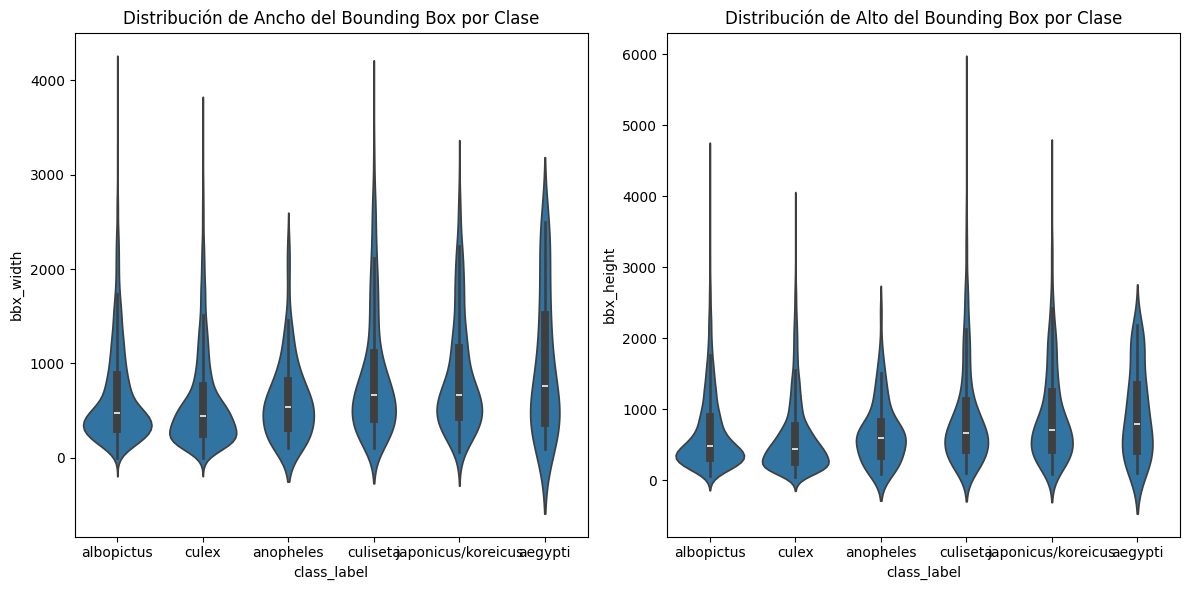

In [9]:
data['bbx_width'] = data['bbx_xbr'] - data['bbx_xtl']
data['bbx_height'] = data['bbx_ybr'] - data['bbx_ytl']
plt.figure(figsize=(12, 6))

# Gráfico de violín para mostrar la distribución de ancho por clase
plt.subplot(1, 2, 1)
sns.violinplot(x='class_label', y='bbx_width', data=data)
plt.title('Distribución de Ancho del Bounding Box por Clase')

# Gráfico de violín para mostrar la distribución de alto por clase
plt.subplot(1, 2, 2)
sns.violinplot(x='class_label', y='bbx_height', data=data)
plt.title('Distribución de Alto del Bounding Box por Clase')

plt.tight_layout()
plt.show()


Las clases albopictus y culex son bastante similares en términos de los tamaños de los cuadros delimitadores, mientras que anopheles y aegypti son más consistentes en el tamaño del cuadro. Las clases como culiseta y japonicus/koreicus muestran una mayor variabilidad, lo que está dificultando su clasificación adecuada. Ajustar los cuadros delimitadores para normalizar el tamaño de las imágenes ayudaría a mejorar la clasificación.
